# Telecom Customer Rentention Project
###  The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

In [102]:
pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 4.2 MB/s eta 0:00:24
   ---------------------------------------- 0.1/99.8 MB 4.2 MB/s eta 0:00:24
   ---------------------------------------- 0.1/99.8 MB 4.2 MB/s eta 0:00:24
   ---------------------------------------- 0.2/99.8 MB 1.1 MB/s eta 0:01:29
   ---------------------------------------- 0.2/99.8 MB 1.3 MB/s eta 0:01:20
   ---------------------------------------- 0.3/99.8 MB 1.1 MB/s eta 0:01:30
   ---------------------------------------- 0.4/99.8 MB 1.4 MB/s eta 0:01:13
   ---------------------------------------- 0.5/99.8 MB 1.5 MB/s eta 0:01:06
   ---------------------------------------- 0.7/99.8 MB 1.8 MB/s eta 0:00:56
   ----------------------------

In [103]:
# package imports
    
# genral packages
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime


from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import shuffle

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from catboost import CatBoostClassifier
from xgboost import XGBClassifier




    

In [2]:
# data frames

contract=pd.read_csv(r'C:\Users\Yash\Documents\GBC\Final_Project_T431\final_provider\datasets\final_provider\contract.csv')
internet=pd.read_csv(r'C:\Users\Yash\Documents\GBC\Final_Project_T431\final_provider\datasets\final_provider\internet.csv')
personal=pd.read_csv(r'C:\Users\Yash\Documents\GBC\Final_Project_T431\final_provider\datasets\final_provider\personal.csv') 
phone=pd.read_csv(r'C:\Users\Yash\Documents\GBC\Final_Project_T431\final_provider\datasets\final_provider\phone.csv')


#### let's look into our data

In [3]:
contract.head(-5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,2016-12-01,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25
7034,0639-TSIQW,2014-03-01,2019-10-01 00:00:00,Month-to-month,Yes,Credit card (automatic),102.95,6886.25
7035,8456-QDAVC,2018-07-01,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1
7036,7750-EYXWZ,2019-02-01,No,One year,No,Electronic check,60.65,743.3


In [4]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [6]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


#### lets look in our data frames info

In [7]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [9]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [10]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


We can identify few things:
1) Contract dataframe:
    1) paperless billing could be in boolean type instead of Object.
    2) startdate and enddate are in object type instead of datteime format.
    3) totalcharges column is not in Float type.
2) Personal dataframe:
    1) Age column could have been a useful column to achieve better analysis.
    2) personal and contract dataframe have same number of entries. which makes sense since not all the customers will be connect to both the plans provided by provider.
    3) gender,partner and dependent could be in boolean type.
3) internet dataframe:
    1) All columns outside of customerID and InternetService could be represented as booleans.
4) phone dataframe:
    1) MultipleLines could be in boolean format.

now we know what we need ot perform in out data processing task.
 

#### check on the duplicate values

In [11]:
print("Number of Duplicates:\n",
      "Contract: ",contract.duplicated().sum(),
      "Personal: ",personal.duplicated().sum(),
      "internet: ",internet.duplicated().sum(),
      "Phone: ",phone.duplicated().sum())

Number of Duplicates:
 Contract:  0 Personal:  0 internet:  0 Phone:  0


looks like our data do not contain any duplicates :)

## Data preparation

In [12]:
contract['BeginDate'] = contract['BeginDate'].astype('datetime64[ns]')

#### using datetime64[ns] beneficial when you need high precision in your time data.

In [13]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


In [14]:
# contract['TotalCharges']=contract['TotalCharges'].astype(float)

look's like there are some values in contract['TotalCharges'] field that is null and that is the reason it cannot convert those null values into float and throwing an error. 
We need to find out what are the values that we need to fill. 

In [15]:
contract[contract['TotalCharges']==' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


In [16]:
contract[contract['BeginDate']=='2020-02-01']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


In [17]:
# this in lije command will help us in filling up the value and converting into numeric.
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce').fillna(0)

In [18]:
contract[contract['TotalCharges']==' ']   ##perfect

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [19]:
end_dates = []  # Initialize an empty list to store datetime objects

for value in contract.EndDate:
    if value != 'No':
        # If the value is not 'No', convert it to a datetime object
        date_and_time = datetime.strptime(value, '%Y-%m-%d %H:%M:%S')
        end_dates.append(date_and_time)
    else:
        # If the value is 'No', use a default datetime object (March 1, 2020, midnight)
        end_dates.append(datetime(2020, 3, 1, 0, 0, 0))


In [20]:
contract.insert(3, 'LastDate', pd.to_datetime(end_dates))

we are takin march 01,2020 for those who has a status 'No' in their endDate. since the contract information is valid as of February 1, 2020 for those who has not cancelled their service will for sure use it till March. 

and we also need to add a new column which tells us the difference between the beginDate and LastDate in numeric format. this will help us to better understand customer stayiing longer or not.

In [21]:
contract.insert(4, 'Duration_Diff', (contract['LastDate']-contract['BeginDate'])/np.timedelta64(1,'M'))

In [22]:
contract

,customerID,BeginDate,EndDate,LastDate,Duration_Diff,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,2020-03-01,1.971293,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,2020-03-01,34.990452,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,2019-12-01,2.004148,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,2020-03-01,45.996838,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,2019-11-01,2.004148,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,2020-03-01,24.936857,One year,Yes,Mailed check,84.80,1990.50
7039,2234-XADUH,2014-02-01,No,2020-03-01,72.937843,One year,Yes,Credit card (automatic),103.20,7362.90
7040,4801-JZAZL,2019-03-01,No,2020-03-01,12.024888,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,2019-11-01,4.041151,Month-to-month,Yes,Mailed check,74.40,306.60


lets add one more column name "ServiceEnded" with boolean value 0 if service is continued by customer and 1 if service has been ended by the customer. 

In [23]:
contract['ServiceEnded']=(contract['EndDate']!='No').astype('int')

In [24]:
contract.head()

,customerID,BeginDate,EndDate,LastDate,Duration_Diff,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ServiceEnded
0,7590-VHVEG,2020-01-01,No,2020-03-01,1.971293,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,No,2020-03-01,34.990452,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,2019-12-01,2.004148,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,No,2020-03-01,45.996838,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,2019-11-01,2.004148,Month-to-month,Yes,Electronic check,70.70,151.65,1


#### why dont we merge all the columns from phone,cntract,internet and personal into one column since we know we have to perform some common action on all the dataframes. this will be easier for training our model in the next process.

In [25]:
# lets merge the column
from functools import reduce

# List of DataFrames to merge
dfs = [contract, phone, personal, internet]

# Merge DataFrames iteratively on 'customerID'
data = reduce(lambda left, right: pd.merge(left, right, on='customerID', how='left'), dfs)



In [26]:
data.head()

,customerID,BeginDate,EndDate,LastDate,Duration_Diff,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,...,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,No,2020-03-01,1.971293,Month-to-month,Yes,Electronic check,29.85,29.85,...,0,Yes,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,2020-03-01,34.990452,One year,No,Mailed check,56.95,1889.50,...,0,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,2019-12-01,2.004148,Month-to-month,Yes,Mailed check,53.85,108.15,...,0,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,2020-03-01,45.996838,One year,No,Bank transfer (automatic),42.30,1840.75,...,0,No,No,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,2019-11-01,2.004148,Month-to-month,Yes,Electronic check,70.70,151.65,...,0,No,No,Fiber optic,No,No,No,No,No,No


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   LastDate          7043 non-null   datetime64[ns]
 4   Duration_Diff     7043 non-null   float64       
 5   Type              7043 non-null   object        
 6   PaperlessBilling  7043 non-null   object        
 7   PaymentMethod     7043 non-null   object        
 8   MonthlyCharges    7043 non-null   float64       
 9   TotalCharges      7043 non-null   float64       
 10  ServiceEnded      7043 non-null   int32         
 11  MultipleLines     6361 non-null   object        
 12  gender            7043 non-null   object        
 13  SeniorCitizen     7043 non-null   int64         
 14  Partner           7043 n

We might have some null values/missing value in our data since the number of entries were different for internet and phone dataframes.so lets check ...

In [28]:
null_values = data.isnull().sum()

# Display the count of null values in each column
print(null_values)

customerID             0
BeginDate              0
EndDate                0
LastDate               0
Duration_Diff          0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
ServiceEnded           0
MultipleLines        682
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
dtype: int64


As expected there are missing values for the columns from  internet and phone data.
Fortunately, these are all at least at present represented by objects and generally are all either "Yes" or "No".

We should set those columns that are all either "yes" or "no" with "no" values. This will leave the "InternetService" column which we could just fill with "No" the same as the others or we could use "None". For the sake of simplicity, we will use "No" for all of the fills.

For example, if a customer has a missing value in the 'OnlineSecurity' column, it might be interpreted as the customer not having an online security service, so the missing value is filled with 'No'.

In [29]:
na_columns=['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
            'StreamingMovies','MultipleLines']

for col in na_columns:
    data[col]=data[col].fillna('No')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   LastDate          7043 non-null   datetime64[ns]
 4   Duration_Diff     7043 non-null   float64       
 5   Type              7043 non-null   object        
 6   PaperlessBilling  7043 non-null   object        
 7   PaymentMethod     7043 non-null   object        
 8   MonthlyCharges    7043 non-null   float64       
 9   TotalCharges      7043 non-null   float64       
 10  ServiceEnded      7043 non-null   int32         
 11  MultipleLines     7043 non-null   object        
 12  gender            7043 non-null   object        
 13  SeniorCitizen     7043 non-null   int64         
 14  Partner           7043 n

In [31]:
data['NetServices'] = [7-x.count('No') for x in zip(data['InternetService'],
                                                    data['OnlineSecurity'],
                                                    data['OnlineBackup'],
                                                    data['DeviceProtection'],
                                                    data['TechSupport'], 
                                                    data['StreamingTV'], 
                                                    data['StreamingMovies'])]

In [32]:
data.head()

,customerID,BeginDate,EndDate,LastDate,Duration_Diff,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,NetServices
0,7590-VHVEG,2020-01-01,No,2020-03-01,1.971293,Month-to-month,Yes,Electronic check,29.85,29.85,...,Yes,No,DSL,No,Yes,No,No,No,No,2
1,5575-GNVDE,2017-04-01,No,2020-03-01,34.990452,One year,No,Mailed check,56.95,1889.50,...,No,No,DSL,Yes,No,Yes,No,No,No,3
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,2019-12-01,2.004148,Month-to-month,Yes,Mailed check,53.85,108.15,...,No,No,DSL,Yes,Yes,No,No,No,No,3
3,7795-CFOCW,2016-05-01,No,2020-03-01,45.996838,One year,No,Bank transfer (automatic),42.30,1840.75,...,No,No,DSL,Yes,No,Yes,Yes,No,No,4
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,2019-11-01,2.004148,Month-to-month,Yes,Electronic check,70.70,151.65,...,No,No,Fiber optic,No,No,No,No,No,No,1


lets continue with our data transformation of all the 'yes','no' columns into boolean 0 or 1. and for gender column into 'male' and 'female'.

In [33]:
# set boolean columns

bool_cols = ['PaperlessBilling', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

# convert to boolean

for columns in bool_cols:
    data[columns] = data[columns].map({'Yes' : 1 ,'No' : 0})

# convert gender to boolean
data['gender'] = data['gender'].map({'Male' : 1 ,'Female' : 0})

In [34]:
data.head()

,customerID,BeginDate,EndDate,LastDate,Duration_Diff,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,NetServices
0,7590-VHVEG,2020-01-01,No,2020-03-01,1.971293,Month-to-month,1,Electronic check,29.85,29.85,...,1,0,DSL,0,1,0,0,0,0,2
1,5575-GNVDE,2017-04-01,No,2020-03-01,34.990452,One year,0,Mailed check,56.95,1889.50,...,0,0,DSL,1,0,1,0,0,0,3
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,2019-12-01,2.004148,Month-to-month,1,Mailed check,53.85,108.15,...,0,0,DSL,1,1,0,0,0,0,3
3,7795-CFOCW,2016-05-01,No,2020-03-01,45.996838,One year,0,Bank transfer (automatic),42.30,1840.75,...,0,0,DSL,1,0,1,1,0,0,4
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,2019-11-01,2.004148,Month-to-month,1,Electronic check,70.70,151.65,...,0,0,Fiber optic,0,0,0,0,0,0,1


## Exploratory Data Analysis
First, we can get a good handle on our data by visualizing it. Most of our visualization will be dealing with the charges since those are our numerical values. We will create a histogram, a box plot, and a correlation matrix.

we will focus primarily on our charges and the amount of services being used.

In [35]:
data[['MonthlyCharges','TotalCharges','ServiceEnded', 'Duration_Diff', 'NetServices']].describe()

,MonthlyCharges,TotalCharges,ServiceEnded,Duration_Diff,NetServices
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,0.265370,33.094739,2.821241
std,30.090047,2266.794470,0.441561,24.713423,2.113505
min,18.250000,0.000000,0.000000,0.952792,0.000000
25%,35.500000,398.550000,0.000000,9.002238,1.000000
50%,70.350000,1394.550000,0.000000,29.963654,3.000000
75%,89.850000,3786.600000,1.000000,56.017577,4.000000
max,118.750000,8684.800000,1.000000,72.937843,7.000000


Most of our customers appear to have a CustomerDuration of around 30 or so, or approximately 2.5 years. On average we can conclude that the average customer is using 3 internet services since that is the mean, and the median is 2.82.

### Histogram

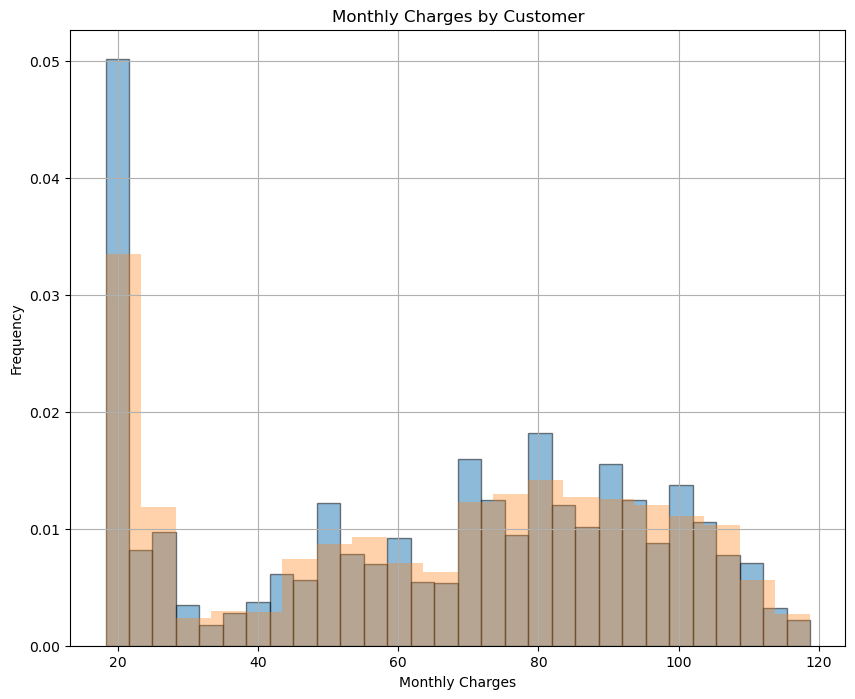

In [36]:
fig = plt.figure(figsize = (10,8))
plt.hist(data['MonthlyCharges'], bins=30, edgecolor='black',density='True',alpha = 0.5)
plt.hist(data['MonthlyCharges'], bins = 20, density = True, alpha = 0.35)
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Monthly Charges by Customer')
plt.grid(True)
plt.show()

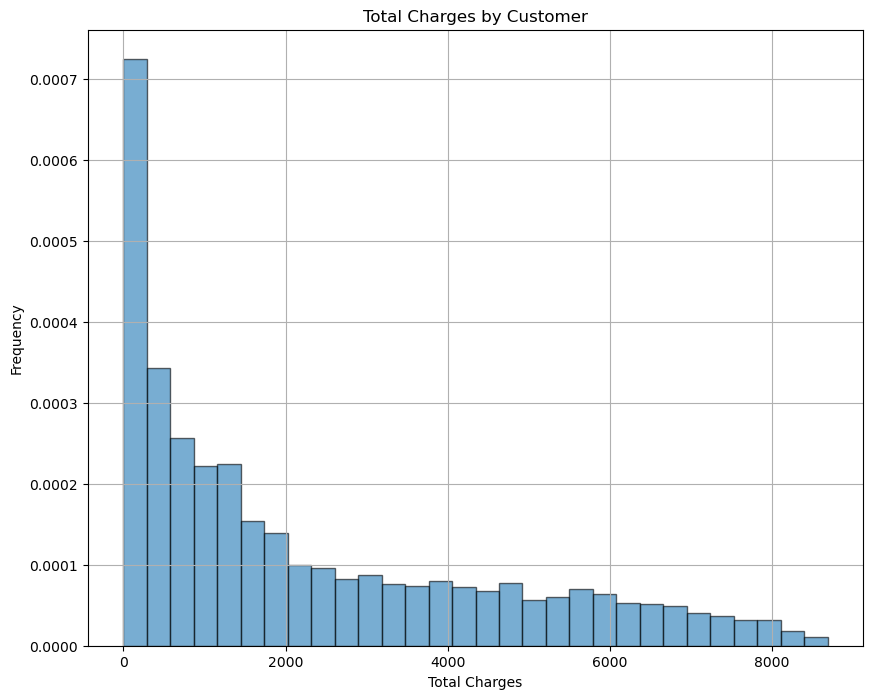

In [37]:
fig = plt.figure(figsize = (10,8))
plt.hist(data['TotalCharges'], bins=30, alpha=0.6, edgecolor='black',density='True')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Total Charges by Customer')
plt.grid(True)
plt.show()

 As we see the Monthly charges histogram its scattered and not showin clear patterns, but with an overlay of smlaler bins we can see that there is pattern. we can expect there are three groups one who is spending between 20 - 35$, one who is spending almost 50$ and other spending 80$.

The histogram for total charges is clear and makes sense. We can expect a decline in total charges amount paid by customers, seems like most of the customer are not staying longer with us or are in the category of minimal monthly cost.

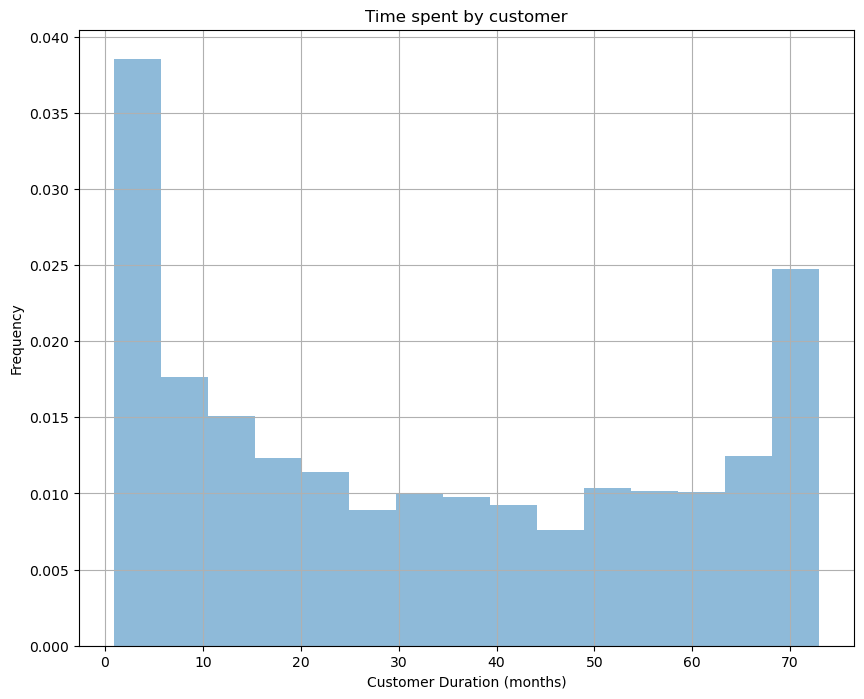

In [38]:
fig = plt.figure(figsize = (10,8))
plt.hist(data['Duration_Diff'], bins=15, alpha=0.5,density='True')
plt.xlabel('Customer Duration (months)')
plt.ylabel('Frequency')
plt.title('Time spent by customer')
plt.grid(True)
plt.show()

We can see most of our customers are living within 10 months of service and after that it seems to be fairly consistent.Likely we can conclude that if we hold a customer for at least six months to one year, they will retain services with us.



### Box Plot
let's check for the ouliers now using the box plot.

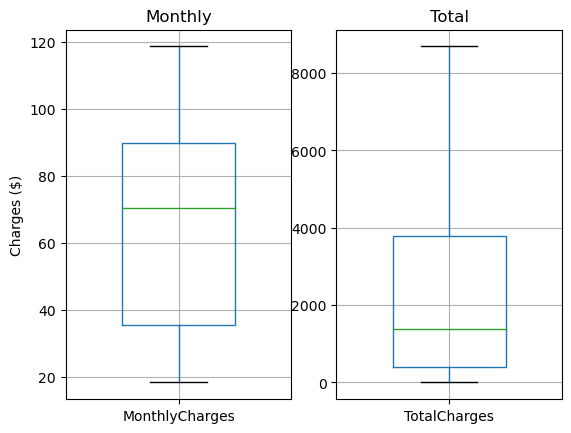

In [39]:
plt.subplot(1, 2, 1)
data.boxplot(column = 'MonthlyCharges', figsize = (5, 5), widths = 0.5)
plt.title('Monthly')
plt.ylabel('Charges ($)')

plt.subplot(1, 2, 2)
data.boxplot(column = 'TotalCharges', figsize = (5, 5), widths = 0.5)
plt.title('Total');

We do not see any outliers, which is useful to know.

### Correlation Matrix

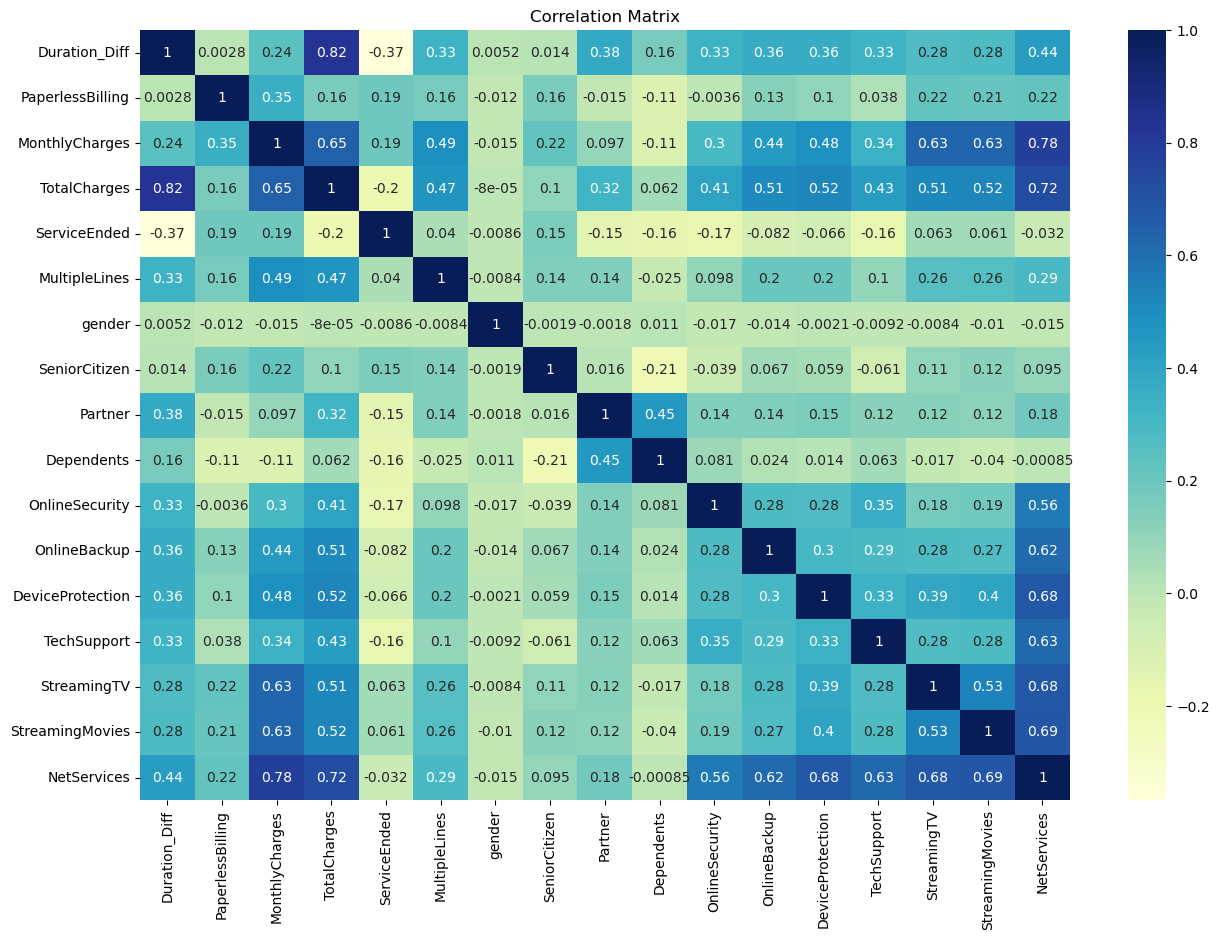

In [40]:
plt.figure(figsize = (15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'YlGnBu')
plt.title('Correlation Matrix')
plt.show();

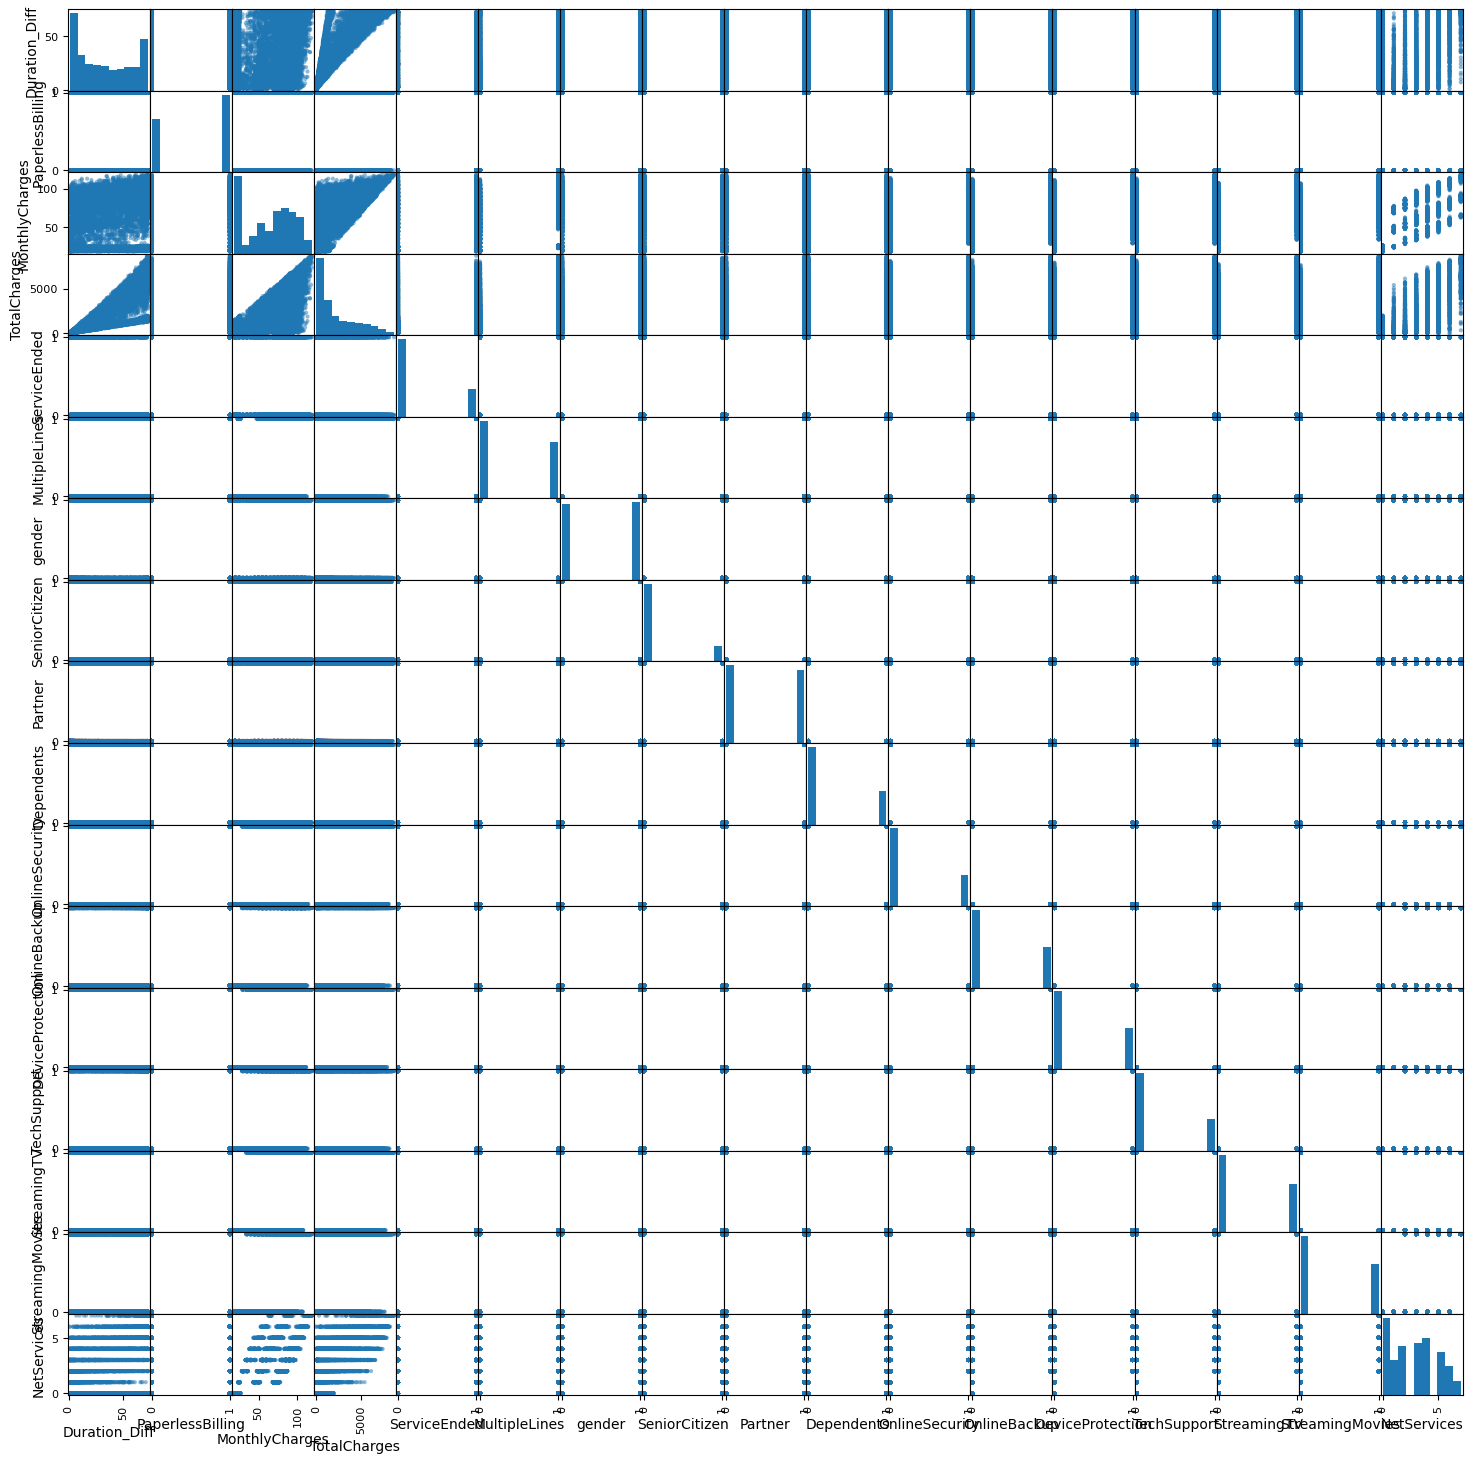

In [41]:
pd.plotting.scatter_matrix(data, figsize=(18, 18))
plt.show()

it appears that the strongest correlations that influence our targets are the ones related to price and the services being used. To summarize some of the insights from the correlation matrix in reference to our target ServiceEnded:

  1) The largest positive correlation to service being ended is the monthly price.
  2) A similarly strong correlation is found if someone is using paperless billing. T
  3) Senior citizens have a moderate correlation with ending their services. This could be unavoidable and the result of    seniors being in their winter years. Though it is possibly something worth thinking about.
  4) Security services have a negative correlation with ServiceEnded and particularly the malicious website blocker. This suggests that our products are doing well with their security systems.
  5) There also is a negative correlation with Tech Support and ServiceEnded, so our tech department seems to be working well.On the other hand, it is very slight but there is a small positive correlation between our streaming services and ServiceEnded = 1. This suggests that perhaps there is something we could improve there.

### Ckecing class imbalance
Our aim is to target customer whose ServceEnded. as we have seen above we might have most of data set to 0,meaning customer is still using our service which might affect our model and providing false positive in our case.

Proportion of class 1: 0.2653698707936959
Proportion of class 0: 0.7346301292063041


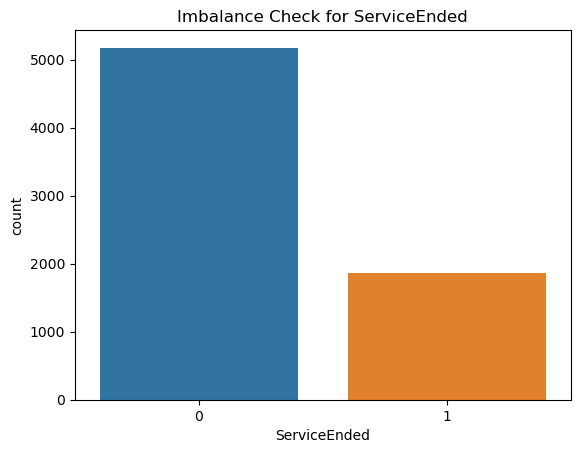

In [42]:
## checking the imbalance of our data
sns.countplot(x='ServiceEnded', data=data)
plt.title('Imbalance Check for ServiceEnded')
print("Proportion of class 1:", len(data[data['ServiceEnded'] == 1]) / len(data))
print("Proportion of class 0:", len(data[data['ServiceEnded'] == 0]) / len(data))
plt.show()

In [75]:
# create features and target

features = data.drop(['customerID', 'BeginDate', 'EndDate', 'LastDate', 'ServiceEnded'], axis = 1)
target = data['ServiceEnded']

In [76]:
# encode categorical features

encoders = {}
for column_name in ['Type', 'PaymentMethod', 'InternetService']:
    encoders[column_name] = LabelEncoder()
    features[column_name] = encoders[column_name].fit_transform(features[column_name])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [97]:

# Assuming 'features' and 'target' are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


### Logistic Regression Model

Accuracy: 0.8219
F1 Score: 0.6388
AUC: 0.8719


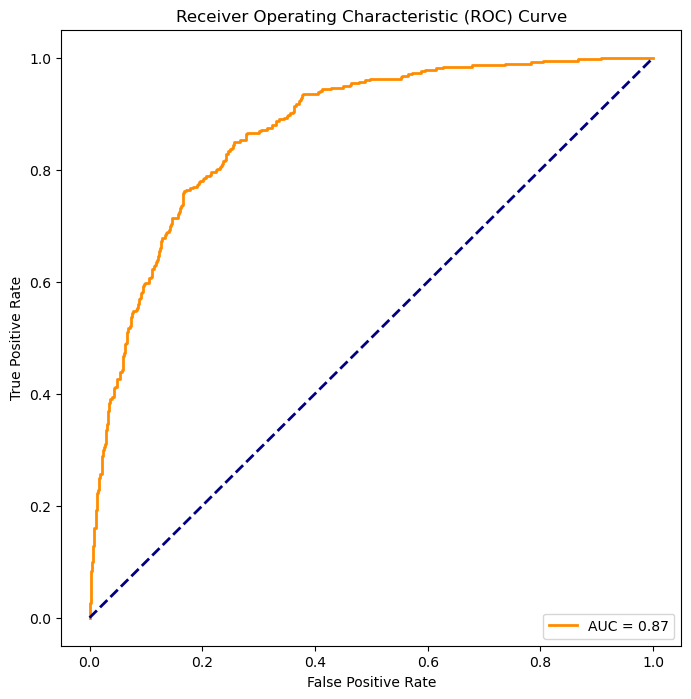

In [98]:
# Create and fit the logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000,random_state=30)
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_lr_pred = model.predict(X_test)
y_lr_proba = model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_lr_pred)
print(f'Accuracy: {accuracy:.4f}')

# F1 Score
f1 = f1_score(y_test, y_lr_pred)
print(f'F1 Score: {f1:.4f}')

# AUC and ROC Curve
roc_auc = roc_auc_score(y_test, y_lr_proba)
print(f'AUC: {roc_auc:.4f}')

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_lr_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest Classifier Model

Accuracy: 0.8510
F1 Score: 0.6708
AUC: 0.8934


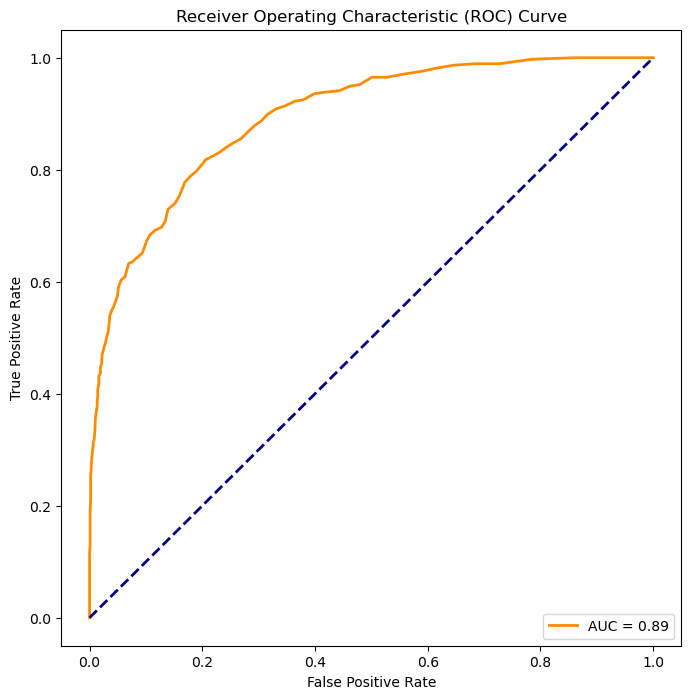

In [99]:
#randomforest classifier
model = RandomForestClassifier(random_state=32)
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_rf_pred = model.predict(X_test)

y_rf_proba = model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_rf_pred)
print(f'Accuracy: {accuracy:.4f}')

# F1 Score
f1 = f1_score(y_test, y_rf_pred)
print(f'F1 Score: {f1:.4f}')

# AUC and ROC Curve
roc_auc = roc_auc_score(y_test, y_rf_proba)
print(f'AUC: {roc_auc:.4f}')
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_rf_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### DecissionTree Model

Accuracy: 0.8332
F1 Score: 0.6912
AUC: 0.7922


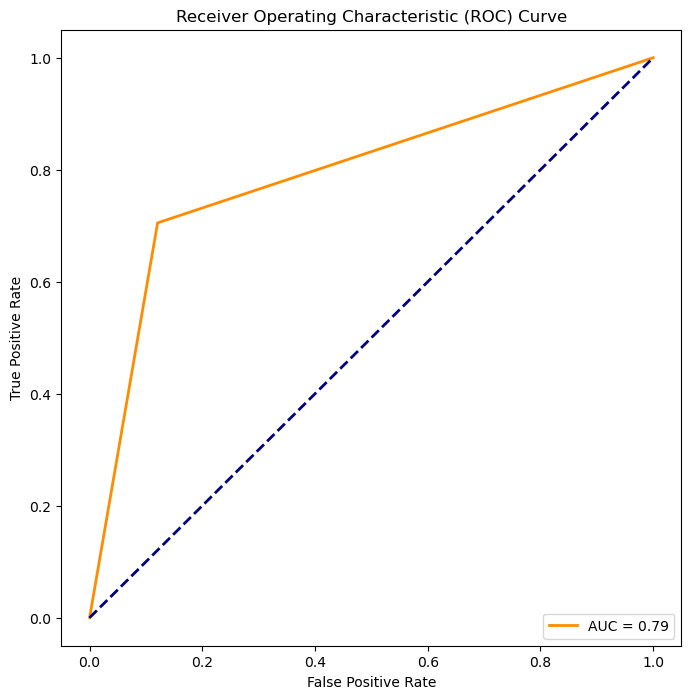

In [100]:
#randomforest classifier
model = DecisionTreeClassifier(random_state=32)
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_df_pred = model.predict(X_test)

y_df_proba = model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_df_pred)
print(f'Accuracy: {accuracy:.4f}')

# F1 Score
f1 = f1_score(y_test, y_df_pred)
print(f'F1 Score: {f1:.4f}')

# AUC and ROC Curve
roc_auc = roc_auc_score(y_test, y_df_proba)
print(f'AUC: {roc_auc:.4f}')
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_df_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.9617
F1 Score: 0.9235
AUC: 0.9864


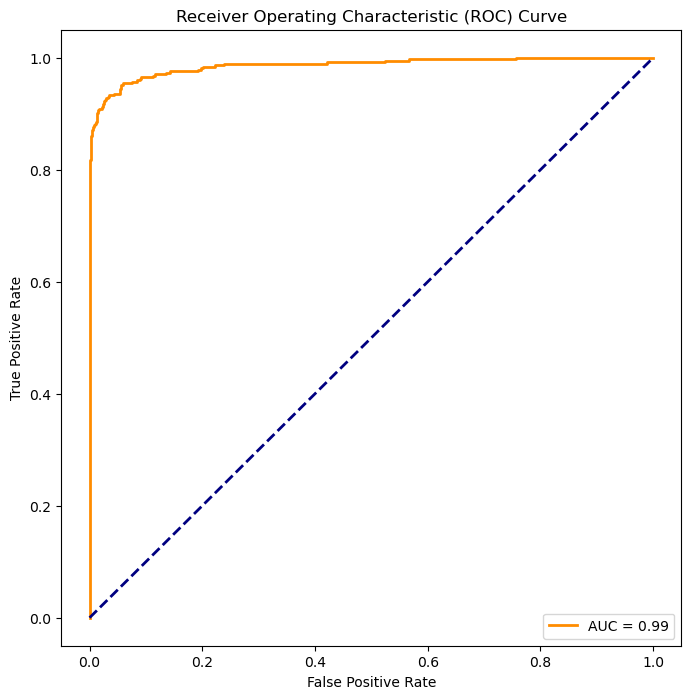

In [104]:
# Create and fit the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

# AUC and ROC Curve
roc_auc = roc_auc_score(y_test, y_proba)
print(f'AUC: {roc_auc:.4f}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc_curve = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc_curve:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Conclusion

In our project we aimed to create a predicitive model that will classify when a user is likely to cancel their services. We would determine our model a success based on the ROC-AUC score. A score lower than 0.75 was defined as too low, and an ideal score would be one higher than 0.88. We also wished to measure accuracy.

Since the goal of the model is to retain customers, we determined that we would prioritize a model even if it had slightly lower accuracy if its accuracy was more inclined towards returning a false positive, as a false positive would result in retaining customers with more certainty and a false negative means that we will have lost a customer that we otherwise might have kept.

First, we preprocessed our data to make all of the metrics usable for building our model. To create a full data set, we made a few key changes. We calculated the number of months a customer had been using the service, encoded our binary features, and counted the number of internet services a customer was utilizing. Doing this, we created a unified data set from our four separate data frames.
We made models across five styles: a dummy model, a decision tree, a logistic regression, a random forest, and a catboost. We first ran tests with no parameter tuning and our original data without accounting for imbalance. There, we created models that met both the standards for ROC-AUC and accuracy. We tried once more with upsampling and while accuracy did slightly rise it tended to be at the cost of returning more false negatives. As stated before, we would prioritize minimalizing false negatives rather than purely aiming for accuracy and so we chose to use our initial models.

Because tuning our hyperparameters is rather time-consuming and we already had achieved a model that was testing with over 0.95 ROC-AUC, we determined that the model was more than sufficient as the one to use.

 - The code is error free and arranged in order of execution.
 
 - Documentation is present directly preceding all code explaining its purpose.
 
 - The data has been downloaded and prepared.
 
 -  Exploratory data analysis with graphical representation has been performed.
 -   The models have been trained.
A final model has been created with an AUC-ROC of at least 0.75


The final model is the XGBoost classifier model, trained on a subset of 60% of the total data set. It uses default hyperparameters. The ROC-AUC against the test set of 20% of the total data set with an accuracy of 0.95. With that accuracy, we can state that the model has approximately 1.29% false negative reports and 6.31% false positive reports.

What this means is that it only has approximately 1.29% chance of failing to identify when a customer is about to leave and a 6.31% chance of falsely identifying that a customer is about to leave when they are not. For the purposes of benefitting customer retention, the model works very well.